In [ ]:
#notebook utilizado para a disciplina de MPT para o bootcamp de machine learning

In [1]:
#importando as bibliotecas
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
import datetime  #biblioteca utilizada para trabalhar com datas
from matplotlib import pyplot as plt  #plotar os gráficos
import seaborn as sns #plot de gráficos

In [2]:
#carregando os dados para o pandas
df_consultas=pd.read_csv('KaggleV2-May-2016.csv')

**Iniciando a análise exploratória**

In [3]:
#mostrando as características do dataset
df_consultas.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#mostrando as dimensões do dataset
df_consultas.shape

(110527, 14)

**Quantas instâncias e atributos existem no dataset?**

In [5]:
#mostrando as "características" das colunas
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#contando a quantidade de valores nulos
df_consultas.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Existem valores nulos?**

In [7]:
df_consultas['No-show'].value_counts() # Yes o paciente não compareceu / No o paciente compareceu

No     88208
Yes    22319
Name: No-show, dtype: int64

In [8]:
df_consultas['No-show'].value_counts()[0] / df_consultas.count()

PatientId         0.798067
AppointmentID     0.798067
Gender            0.798067
ScheduledDay      0.798067
AppointmentDay    0.798067
Age               0.798067
Neighbourhood     0.798067
Scholarship       0.798067
Hipertension      0.798067
Diabetes          0.798067
Alcoholism        0.798067
Handcap           0.798067
SMS_received      0.798067
No-show           0.798067
dtype: float64

In [9]:
df_consultas['AppointmentDay'].value_counts()

2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    4090
2016-05-24T00:00:00Z    4009
2016-05-13T00:00:00Z    3987
2016-05-25T00:00:00Z    3909
2016-05-06T00:00:00Z    3879
2016-05-20T00:00:00Z    3828
2016-04-29T00:00:00Z    3235
2016-05-14T00:00:00Z      39
Name: AppointmentDay, dtype: int64

In [10]:
df_consultas['SMS_received'].value_counts() # 0 o paciente não recebeu / 1 o paciente recebeu

0    75045
1    35482
Name: SMS_received, dtype: int64

In [11]:
df_consultas['No-show'].value_counts()['No']/len(df_consultas)

0.798067440534892

In [12]:
len(df_consultas['No-show'])

110527

In [13]:
df_consultas['No-show'].value_counts()['No']

88208

In [14]:
#analisando as "estatísticas do dataset"
df_consultas.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [15]:
df_consultas['PatientId'].value_counts().head(20)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
7.579746e+13    62
2.584244e+11    62
6.264199e+12    62
8.713749e+14    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
9.452745e+12    42
8.189452e+13    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
Name: PatientId, dtype: int64

**Qual é a idade média dos pacientes?**

In [17]:
df_consultas['Age'].mean()

37.08887421173107

In [16]:
#contando a quantidade de valores distintos em cada uma das colunas
for colunas in list(df_consultas.columns):
  print( "{0:25} {1}".format(colunas, df_consultas[colunas].nunique()) )

# ScheduledDay - The day someone called or registered the appointment, this is before appointment of course.
# AppointmentDay - The day of the actuall appointment, when they have to visit the doctor.

PatientId                 62299
AppointmentID             110527
Gender                    2
ScheduledDay              103549
AppointmentDay            27
Age                       104
Neighbourhood             81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2


**Em quantas localidades diferentes (Neighbourhood) os pacientes residem?**

In [ ]:
#Neighbourhood             81

**Comparando a identificação do paciente (PatientId) com o número dos agendamentos das consultas (AppointmentID) o que podemos inferir?**

**Quantas variáveis binárias (apenas dois valores) existem no dataset?**

In [18]:
#contando quantas idades diferentes existem no df
df_consultas['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

<AxesSubplot:>

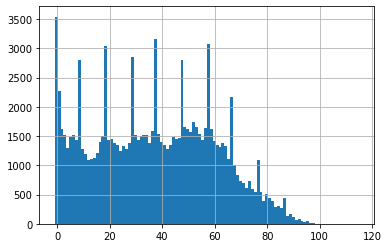

In [19]:
#plotando o histograma de algumas variáveis 
df_consultas['Age'].hist(bins=len(df_consultas['Age'].unique()))

<AxesSubplot:>

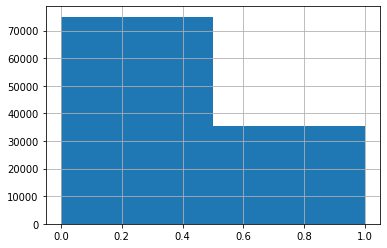

In [20]:
df_consultas['SMS_received'].hist(bins=len(df_consultas['SMS_received'].unique()))

In [21]:
df_consultas['SMS_received'].unique()

array([0, 1], dtype=int64)

**Quantos valores diferentes encontramos para a variável dos SMS recebidos (SMS_received)?**

In [27]:
#criando uma nova coluna -> Tempo de espera (diferença entre a data em que a consulta foi agendada e o dia da consulta)
df_consultas.ScheduledDay=pd.to_datetime(df_consultas.ScheduledDay)  #transformando as colunas par o tipo datetime
df_consultas.AppointmentDay=pd.to_datetime(df_consultas.AppointmentDay)

In [28]:
#Encontra a diferença entre o momento da marcação da consulta e o dia da consulta
tempo_espera=df_consultas.ScheduledDay-df_consultas.AppointmentDay

In [29]:
tempo_espera[:10]

0     0 days 18:38:08
1     0 days 16:08:27
2     0 days 16:19:04
3     0 days 17:29:31
4     0 days 16:07:23
5   -2 days +08:36:51
6   -2 days +15:05:12
7   -2 days +15:39:58
8     0 days 08:02:16
9   -2 days +12:48:25
dtype: timedelta64[ns]

In [30]:
df_consultas['AwaitingTime']=tempo_espera.apply(lambda x: x.days) #transforma os valores em dias 

In [31]:
df_consultas.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,-2
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,-2
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,-2


In [32]:
df_consultas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

**Iniciando o tratamento dos dados**

**Qual é a menor e maior idade, respectivamente, presente no dataset?**

In [34]:
#Encontrando as idades negativas
df_consultas[df_consultas['Age'] < 0]['Age'].value_counts()

-1    1
Name: Age, dtype: int64

In [35]:
df_consultas['Age'].max()

115

In [36]:
#filtrando apenas idades maiores que 0
df_consultas_filtrado=df_consultas[df_consultas['Age']>=0]
df_consultas_filtrado.shape

(110526, 15)

**Quantos valores de idade menores do que 0 existem no dataframe?**

In [37]:
#transformando os tempo de espera para um valor não negativo
df_consultas_filtrado['AwaitingTime'] = df_consultas_filtrado['AwaitingTime'].apply(lambda x: abs(x))

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
df_consultas_filtrado.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [39]:
#aplicando a transformação para os dados categóricos
categoricas=['Neighbourhood','Gender','No-show']
for coluna in categoricas:
  df_consultas_filtrado[coluna]=pd.Categorical(df_consultas_filtrado[coluna]).codes


ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
df_consultas_filtrado.head(8)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AwaitingTime
0,2.987250e+13,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,39,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,39,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,45,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,54,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,39,0,1,1,0,0,0,0,0
5,9.598513e+13,5626772,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,58,0,1,0,0,0,0,0,2
6,7.336882e+14,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,25,0,0,0,0,0,0,1,2
7,3.449833e+12,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,25,0,0,0,0,0,0,1,2


**Qual o tipo de transformação foi utilizada?**

Text(0, 0.5, 'Frequência')

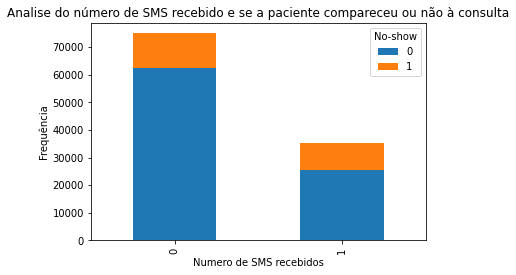

In [41]:
#analisando os SMS enviados e o número de vezes que o paciente compareceu ou não 
sms_x_comparecer = df_consultas_filtrado.groupby(['SMS_received', 'No-show'])['SMS_received'].count().unstack('No-show').fillna(0)
sms_x_comparecer[[0, 1]].plot(kind='bar', stacked=True) 
plt.title('Analise do número de SMS recebido e se a paciente compareceu ou não à consulta') 
plt.xlabel('Numero de SMS recebidos') 
plt.ylabel('Frequência')

In [46]:
sms_x_comparecer

No-show,0,1
SMS_received,,
0,62509,12535
1,25698,9784


**Qual é a proporção de pacientes que receberam o sms e NÃO compareceram?**

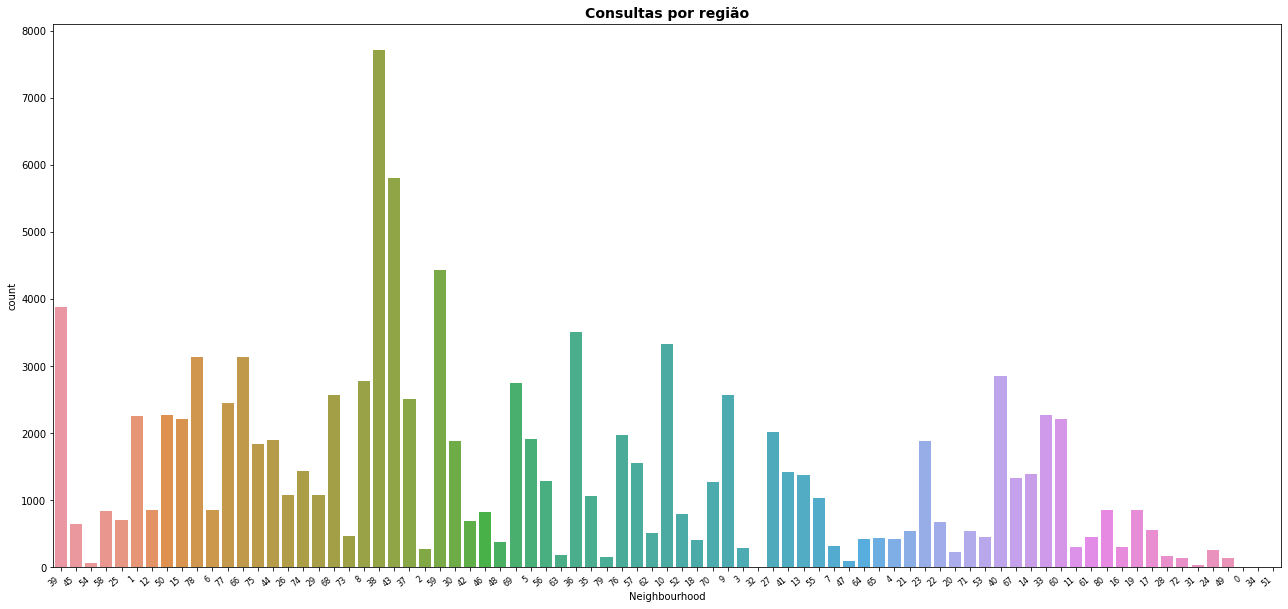

In [42]:
#plotando o número de consultas por região 
regioes = df_consultas_filtrado['Neighbourhood'].unique()
plt.figure(figsize=(22,10))
ax = sns.countplot(x='Neighbourhood', data=df_consultas_filtrado, order=regioes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Consultas por região', fontsize=14, fontweight='bold')
plt.show()

**Qual região possui o maior número de consultas marcadas?**

In [47]:
#selecionando os dados para a construção da previsão
entradas = ['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','SMS_received','AwaitingTime']
saida=['No-show']

In [48]:
x=df_consultas_filtrado[entradas]
y=df_consultas_filtrado[saida]

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [50]:
x_train.shape

(77368, 9)

In [51]:
#aplicando um modelo de classificação via árvore de decisão
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier() 
clf_arvore.fit(x_train, y_train) 

DecisionTreeClassifier()

In [52]:
#realiza a previsão com os dados
y_previsto = clf_arvore.predict(x_test) 

In [53]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_previsto)

In [55]:
acuracia

0.7336087821943422

In [54]:
#contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_previsto)
print(matriz_confusao)

[[22229  4256]
 [ 4577  2096]]


In [56]:
print(classification_report(y_test,y_previsto))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     26485
           1       0.33      0.31      0.32      6673

    accuracy                           0.73     33158
   macro avg       0.58      0.58      0.58     33158
weighted avg       0.73      0.73      0.73     33158



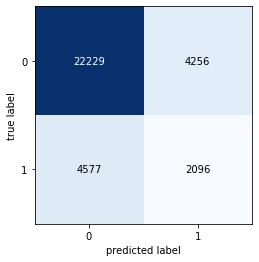

In [57]:
#realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()